In [1]:
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from lightgbm import LGBMRegressor
import shap
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np


# print the JS visualization code to the notebook
shap.initjs()

In [2]:
data_dir = "C:/Users/Jayde/Desktop/wavegan/sctf1.1/raw_data.csv"
data = pd.read_csv(data_dir)
y = data["F0"]
X = data.drop("F0", axis =1)

# create a train/test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=7)

In [3]:
model = LGBMRegressor(random_state=42)

In [4]:
model.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005274 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 24280
[LightGBM] [Info] Number of data points in the train set: 880, number of used features: 100
[LightGBM] [Info] Start training from score 686.851918


LGBMRegressor(random_state=42)

In [5]:
y_pred = model.predict(X_val)

In [6]:
# Calculate RMSE
rmse = mean_squared_error(y_val, y_pred, squared=False)
print(f"RMSE: {rmse}")

RMSE: 1143.5178639440066


In [11]:
explainer = shap.TreeExplainer(model)
shap_values = explainer(X)

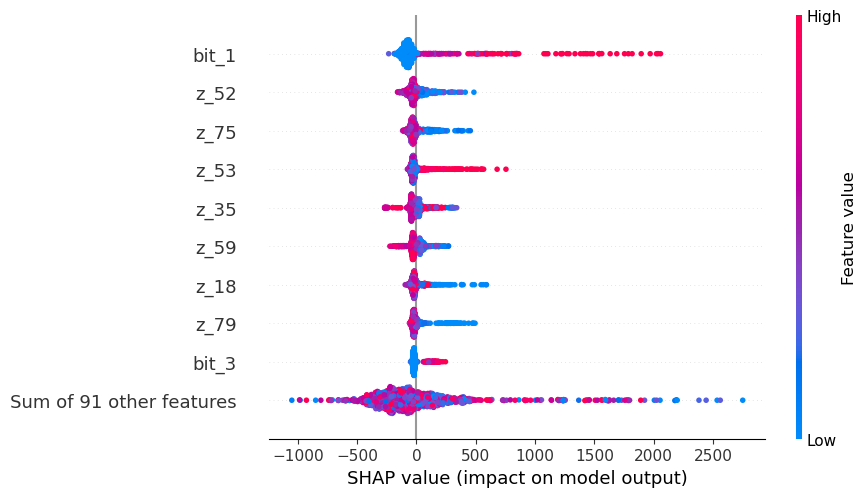

In [12]:
shap.plots.beeswarm(shap_values).savefig("beeswarm.png")